In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression #impor logistic regression buat klasifikasi linier probabilistik
from sklearn.metrics import roc_auc_score #impor fungsi buat itung AUC ROC
X, y = load_breast_cancer(return_X_y=True) #memasukkan data kanker payudara ke variabel X dan y
# X berisi fitur, y berisi label (0 atau 1)
clf = LogisticRegression(solver="newton-cholesky", random_state=0).fit(X, y)
#menggunakan Logistic Regression dengan solver newton-cholesky untuk melatih model pada data X dan y
# random_state=0 untuk memastikan hasil yang konsisten
roc_auc_score(y, clf.predict_proba(X)[:, 1])
# Menghitung AUC ROC menggunakan probabilitas prediksi
# clf.predict_proba(X)[:, 1] mengambil probabilitas kelas positif (1)
roc_auc_score(y, clf.decision_function(X))
# Menghitung AUC ROC menggunakan fungsi keputusan
# clf.decision_function(X) memberikan nilai keputusan untuk setiap sampel

0.9946752285819989

In [75]:
load_breast_cancer(return_X_y=True, as_frame=True)

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 1. Load full dataset (tanpa train-test split)
X, y = load_breast_cancer(return_X_y=True)

# 2. Train model
clf = LogisticRegression(solver="newton-cholesky", random_state=0)
clf.fit(X, y)

# 3. Ambil probabilitas kelas 1
y_scores = clf.predict_proba(X)[:, 1]

# 4. Hitung TPR & FPR secara manual di berbagai threshold
thresholds = np.sort(np.unique(y_scores))[::-1] # Mengambil threshold unik dari y_scores dan mengurutkannya secara menurun
# np.sort(np.unique(y_scores)) mengurutkan nilai unik dari y_scores
TPR = [] # True Positive Rate (TPR) untuk menyimpan nilai TPR
FPR = [] # False Positive Rate (FPR) untuk menyimpan nilai FPR

P = sum(y == 1) # Jumlah positif (kelas 1)
# P = sum(y == 1) menghitung jumlah sampel dengan label 1 (positif)
N = sum(y == 0) # Jumlah negatif (kelas 0)
# N = sum(y == 0) menghitung jumlah sampel dengan label 0 (negatif)

for t in thresholds: # iterasi setiap threshold
    # Hitung True Positive Rate (TPR) dan False Positive Rate (FPR)
    y_pred = (y_scores >= t).astype(int) # prediksi kelas 1 jika skor >= threshold
    TP = np.sum((y_pred == 1) & (y == 1)) # hitung True Positives
    FP = np.sum((y_pred == 1) & (y == 0)) # hitung False Positives
    TPR.append(TP / P) # True Positive Rate = TP / Jumlah Positif
    FPR.append(FP / N) # False Positive Rate = FP / Jumlah Negatif

# 5. Tambahkan titik (0,0) dan (1,1) jika belum ada
if FPR[0] != 0.0 or TPR[0] != 0.0: # cek apakah titik (0,0) sudah ada
    # Jika tidak, tambahkan ke awal
    FPR.insert(0, 0.0)
    TPR.insert(0, 0.0)
if FPR[-1] != 1.0 or TPR[-1] != 1.0: # cek apakah titik (1,1) sudah ada
    # Jika tidak, tambahkan ke akhir
    FPR.append(1.0)
    TPR.append(1.0)

# 6. Hitung AUC manual
manual_auc = np.trapz(TPR, FPR) # Menggunakan metode trapezoidal untuk menghitung AUC
#trapezoidal >> menghitung luas di bawah kurva TPR vs FPR (mendekati integral tak tentu)
print(f"AUC manual = {manual_auc:.6f}")


AUC manual = 0.994675


C:\Users\71476\AppData\Local\Temp\ipykernel_20440\431003794.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  manual_auc = np.trapz(TPR, FPR)


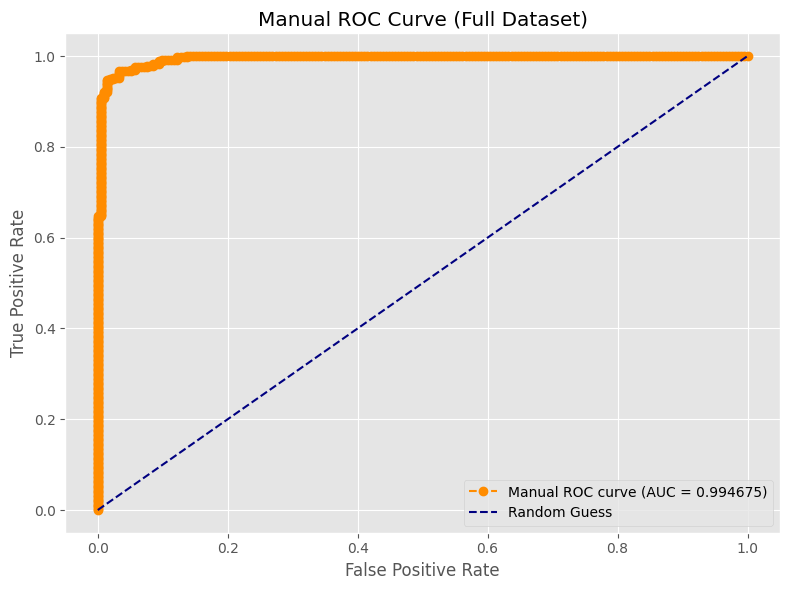

In [ ]:
# 7. Visualisasi ROC Curve
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, marker='o', linestyle='--', color='darkorange',
         label=f'Manual ROC curve (AUC = {manual_auc:.6f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess') # Garis diagonal untuk random guess
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Manual ROC Curve (Full Dataset)') 
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()